In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics,model_selection

In [6]:
data=pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')
data.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


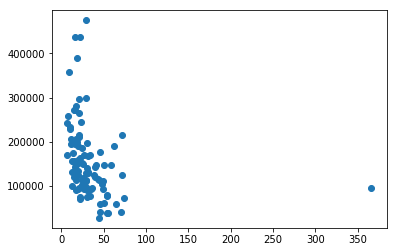

In [16]:
plt.scatter(data['CrimeRate'],data['HousePrice'])
plt.show()

### with outlier point

In [17]:
# linear regression
model=LinearRegression()
model.fit(data[['CrimeRate']],data[['HousePrice']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
pred=model.predict(data[['CrimeRate']])

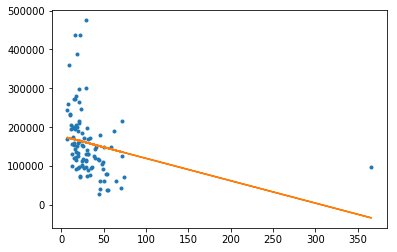

In [20]:
# plot of actual vs predicted
plt.plot(data['CrimeRate'],data['HousePrice'],'.',data['CrimeRate'],pred,'-')
plt.show()

In [21]:
## contains an outlier

In [22]:
data[data['CrimeRate']>350]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [23]:
data[data['MilesPhila']==0.0]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [25]:
# remove outlier
new_data=data[data['MilesPhila']!=0.0]

## without outlier point

In [28]:
# again fit model
new_model=LinearRegression()
new_model.fit(new_data[['CrimeRate']],new_data[['HousePrice']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
new_pred=new_model.predict(new_data[['CrimeRate']])

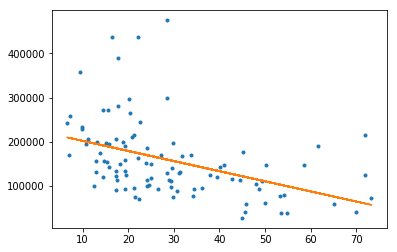

In [31]:
# plot of actual vs predicted
plt.plot(new_data['CrimeRate'],new_data['HousePrice'],'.',new_data['CrimeRate'],new_pred,'-')
plt.show()

In [32]:
# now plot justified

### coef and intercept

In [34]:
model.coef_

array([[-576.90812768]])

In [35]:
new_model.coef_

array([[-2288.68942995]])

In [36]:
## coeff and intercept changes significantly

In [37]:
model.intercept_

array([176629.40810695])

In [38]:
new_model.intercept_

array([225233.551839])

## some more points

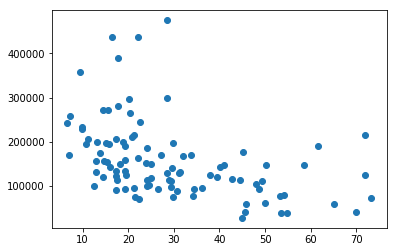

In [41]:
plt.scatter(new_data['CrimeRate'],new_data['HousePrice'])
plt.show()

In [42]:
data=new_data[new_data['HousePrice']<350000]

In [44]:
model2=LinearRegression()
model2.fit(data[['CrimeRate']],data[['HousePrice']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
pred=model2.predict(data[['CrimeRate']])

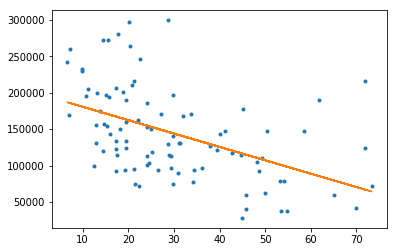

In [46]:
# plot of actual vs predicted
plt.plot(data['CrimeRate'],data['HousePrice'],'.',data['CrimeRate'],pred,'-')
plt.show()

In [51]:
print(model.coef_)
print(model2.coef_)
print(new_model.coef_)

[[-576.90812768]]
[[-1838.56264859]]
[[-2288.68942995]]


In [52]:
print(model.intercept_)
print(model2.intercept_)
print(new_model.intercept_)

[176629.40810695]
[199098.8526698]
[225233.551839]


In [53]:
## changed but less than before